In [1]:
# import packages
import datetime
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

# basic data EDA

In [2]:
bs_reviews = pd.read_csv("./data/boston_reviews.csv")
bs_reviews.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,1178162,4724140,2013-05-21,4298113,Olivier,My stay at islam's place was really cool! Good...
1,1178162,4869189,2013-05-29,6452964,Charlotte,Great location for both airport and city - gre...
2,1178162,5003196,2013-06-06,6449554,Sebastian,We really enjoyed our stay at Islams house. Fr...
3,1178162,5150351,2013-06-15,2215611,Marine,The room was nice and clean and so were the co...
4,1178162,5171140,2013-06-16,6848427,Andrew,Great location. Just 5 mins walk from the Airp...


In [4]:
bs_listing = pd.read_csv("./data/boston_listings.csv")
bs_listing.head(2)

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,12147973,https://www.airbnb.com/rooms/12147973,20160906204935,2016-09-07,Sunny Bungalow in the City,"Cozy, sunny, family home. Master bedroom high...",The house has an open and cozy feel at the sam...,"Cozy, sunny, family home. Master bedroom high...",none,"Roslindale is quiet, convenient and friendly. ...",...,NaN,f,NaN,NaN,f,moderate,f,f,1,NaN
1,3075044,https://www.airbnb.com/rooms/3075044,20160906204935,2016-09-07,Charming room in pet friendly apt,Charming and quiet room in a second floor 1910...,Small but cozy and quite room with a full size...,Charming and quiet room in a second floor 1910...,none,"The room is in Roslindale, a diverse and prima...",...,9.0,f,NaN,NaN,t,moderate,f,f,1,1.3


In [28]:
bs_calendar = pd.read_csv("./data/boston_calendar.csv")
bs_calendar.head()
bs_calendar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1308890 entries, 0 to 1308889
Data columns (total 4 columns):
listing_id    1308890 non-null int64
date          1308890 non-null object
available     1308890 non-null object
price         643037 non-null object
dtypes: int64(1), object(3)
memory usage: 39.9+ MB


In [6]:
# have a closer look at listing data
bs_listing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3585 entries, 0 to 3584
Data columns (total 95 columns):
id                                  3585 non-null int64
listing_url                         3585 non-null object
scrape_id                           3585 non-null int64
last_scraped                        3585 non-null object
name                                3585 non-null object
summary                             3442 non-null object
space                               2528 non-null object
description                         3585 non-null object
experiences_offered                 3585 non-null object
neighborhood_overview               2170 non-null object
notes                               1610 non-null object
transit                             2295 non-null object
access                              2096 non-null object
interaction                         2031 non-null object
house_rules                         2393 non-null object
thumbnail_url                       2986

# Availability and Prices

In [30]:
# change date type 'object' to 'datetime'
to_datetime = lambda x: datetime.datetime.strptime(str(x),'%Y-%m-%d')
bs_calendar.date = bs_calendar.date.apply(to_datetime)

In [71]:
# total number of available home each day
avaliable_count_bs = bs_calendar.groupby('date').apply(lambda x: x.notnull().sum())[['price']]
# change column name
avaliable_count_bs = avaliable_count_bs.rename({"price":"total number of available houses"},axis='columns')

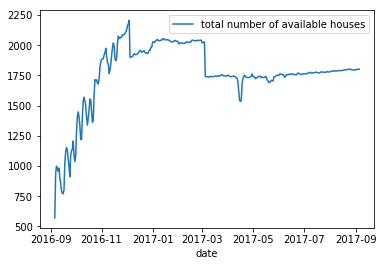

In [81]:
sns.lineplot(data=avaliable_count_bs)

In [44]:
# everyday average prices
bs_calendar_open = bs_calendar[bs_calendar.price.notnull()]
remove_dollar = lambda x: float(x.replace('$','').replace(',',''))
bs_calendar_open.price = bs_calendar_open.price.apply(remove_dollar)


/home/joopoo/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:4401: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [86]:
# average house price for boston everyday
average_price_bs = bs_calendar_open.groupby('date').mean()[['price']]
# change column name
average_price_bs = average_price_bs.rename({"price":"average prices"},axis='columns')

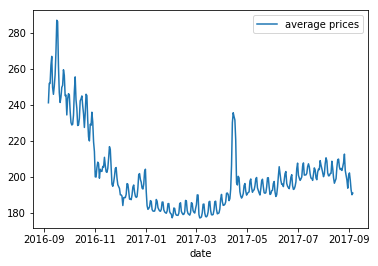

In [87]:
sns.lineplot(data=average_price_bs)

In [89]:
# check general price distribution
bs_calendar_open.describe()

,listing_id,price
count,6.430370e+05,643037.000000
mean,7.699288e+06,198.438909
std,4.766178e+06,180.142913
min,3.353000e+03,11.000000
25%,3.616081e+06,85.000000
50%,7.789055e+06,150.000000
75%,1.228796e+07,255.000000
max,1.493346e+07,7163.000000


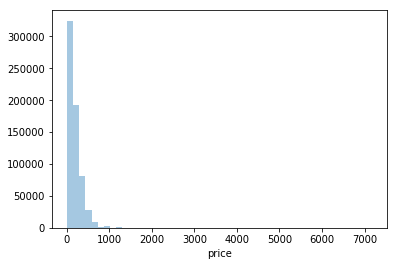

In [90]:
sns.distplot(bs_calendar_open.price, kde=False)
# price large than 1000 is pretty rare

In [66]:
# average avaliablity for each house
avaliable_days_bs = bs_calendar.groupby('listing_id').apply(lambda x: x.notnull().mean())[['price']]

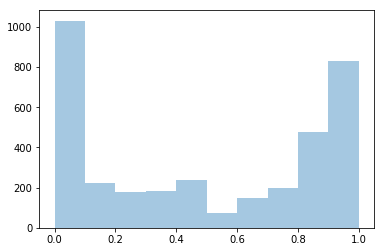

In [67]:
#avaliable_days_bs.head()
sns.distplot(avaliable_days_bs, kde=False)
# a large portion of houses are available for a small portion of days

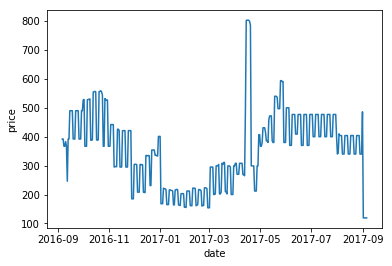

In [17]:
# visualize price change pattern for a particular listing 
list_price_eg = bs_calendar_open[bs_calendar_open.listing_id == 14421304]
sns.lineplot(x="date",y="price", data=list_price_eg)

# House number increase pattern

In [100]:
# what's the trend of airbnb business growth?
# change date type 'str' to 'datetime'
to_datetime = lambda x: datetime.datetime.strptime(str(x),'%Y-%m-%d')
bs_listing.host_since = bs_listing.host_since.apply(to_datetime)

In [115]:
# host since house count
bs_cumhost = bs_listing.groupby('host_since').count()[['id']]
# change column name
bs_cumhost = bs_cumhost.rename({"id":"house_num"},axis='columns')

In [117]:
bs_cumhost['cum_house_num'] = bs_cumhost.house_num.cumsum()
bs_cumhost.head()

,house_num,cum_house_num
host_since,,
2008-11-11,2,2
2008-12-03,1,3
2009-02-16,1,4
2009-02-17,1,5
2009-02-19,6,11


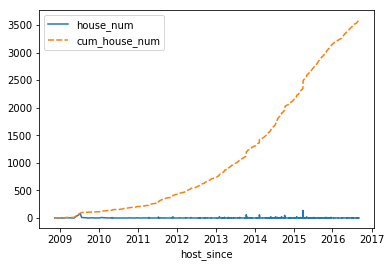

In [118]:
sns.lineplot(data=bs_cumhost)
# it grows exponentially

# Ratings and Prices

In [144]:
# select price and ratings and dropna
bs_price_rate = bs_listing[["id","price","review_scores_rating","number_of_reviews"]].dropna()

In [145]:
bs_price_rate.price = bs_price_rate.price.apply(remove_dollar)

In [146]:
bs_price_rate.head()

,id,price,review_scores_rating,number_of_reviews
1,3075044,65.0,94.0,36
2,6976,65.0,98.0,41
3,1436513,75.0,100.0,1
4,7651065,79.0,99.0,29
5,12386020,75.0,100.0,8


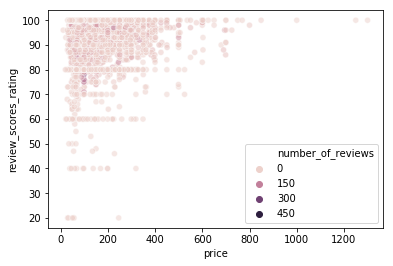

In [157]:
sns.scatterplot(x='price',y='review_scores_rating',hue='number_of_reviews',alpha=0.5,data=bs_price_rate)
# low ratings are associate with lower prices.
# however high rating dose not mean high price

In [156]:
bs_price_rate.describe()

,id,price,review_scores_rating,number_of_reviews,rprate
count,2.772000e+03,2772.000000,2772.000000,2772.000000,2772.000000
mean,7.627088e+06,166.684343,91.916667,24.606782,0.804174
std,4.386274e+06,112.972898,9.531686,38.730995,0.535116
min,3.353000e+03,11.000000,20.000000,1.000000,0.076923
25%,4.078974e+06,85.000000,89.000000,3.000000,0.428415
50%,7.713772e+06,145.000000,94.000000,10.000000,0.646667
75%,1.175728e+07,215.000000,98.250000,29.000000,1.094118
max,1.484378e+07,1300.000000,100.000000,404.000000,8.727273


# Price influence factors

In [ ]:
# price and neighborhood
price_area = bs_listing.groupby('')